# Import Libraries

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(15, 15)})


In [2]:
HepatitisC= pd.read_csv('HepatitisCdata.csv')
df = HepatitisC.copy()
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [5]:
df['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

In [6]:
(df.isna().sum()/df.shape[0])*100

Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
ALB           0.162602
ALP           2.926829
ALT           0.162602
AST           0.000000
BIL           0.000000
CHE           0.000000
CHOL          1.626016
CREA          0.000000
GGT           0.000000
PROT          0.162602
dtype: float64

In [7]:
df.dropna(inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


# EDA

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,589.0,47.417657,9.931334,23.00,39.00,47.00,54.00,77.00
ALB,589.0,41.624278,5.761794,14.90,38.80,41.90,45.10,82.20
ALP,589.0,68.123090,25.921072,11.30,52.50,66.20,79.90,416.60
ALT,589.0,26.575382,20.863120,0.90,16.40,22.70,31.90,325.30
AST,589.0,33.772835,32.866871,10.60,21.50,25.70,31.70,324.00
BIL,589.0,11.018166,17.406572,0.80,5.20,7.10,11.00,209.00
CHE,589.0,8.203633,2.191073,1.42,6.93,8.26,9.57,16.41
CHOL,589.0,5.391341,1.128954,1.43,4.62,5.31,6.08,9.67
CREA,589.0,81.669100,50.696991,8.00,68.00,77.00,89.00,1079.10
GGT,589.0,38.198472,54.302407,4.50,15.60,22.80,37.60,650.90


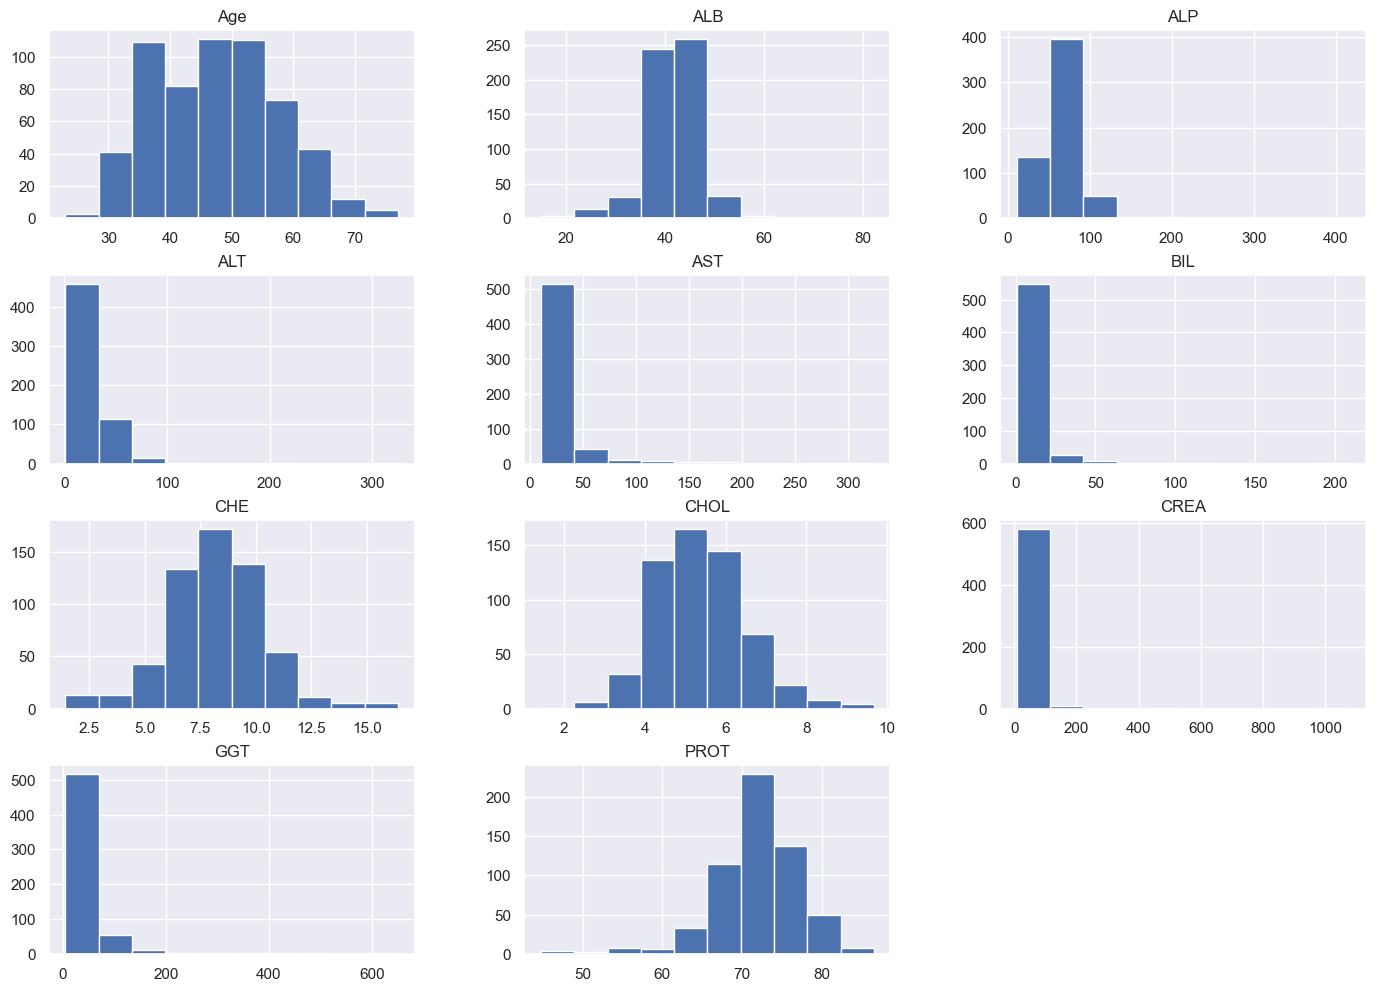

In [10]:
sns.set(rc={'figure.figsize':(17, 12)})
df.hist();

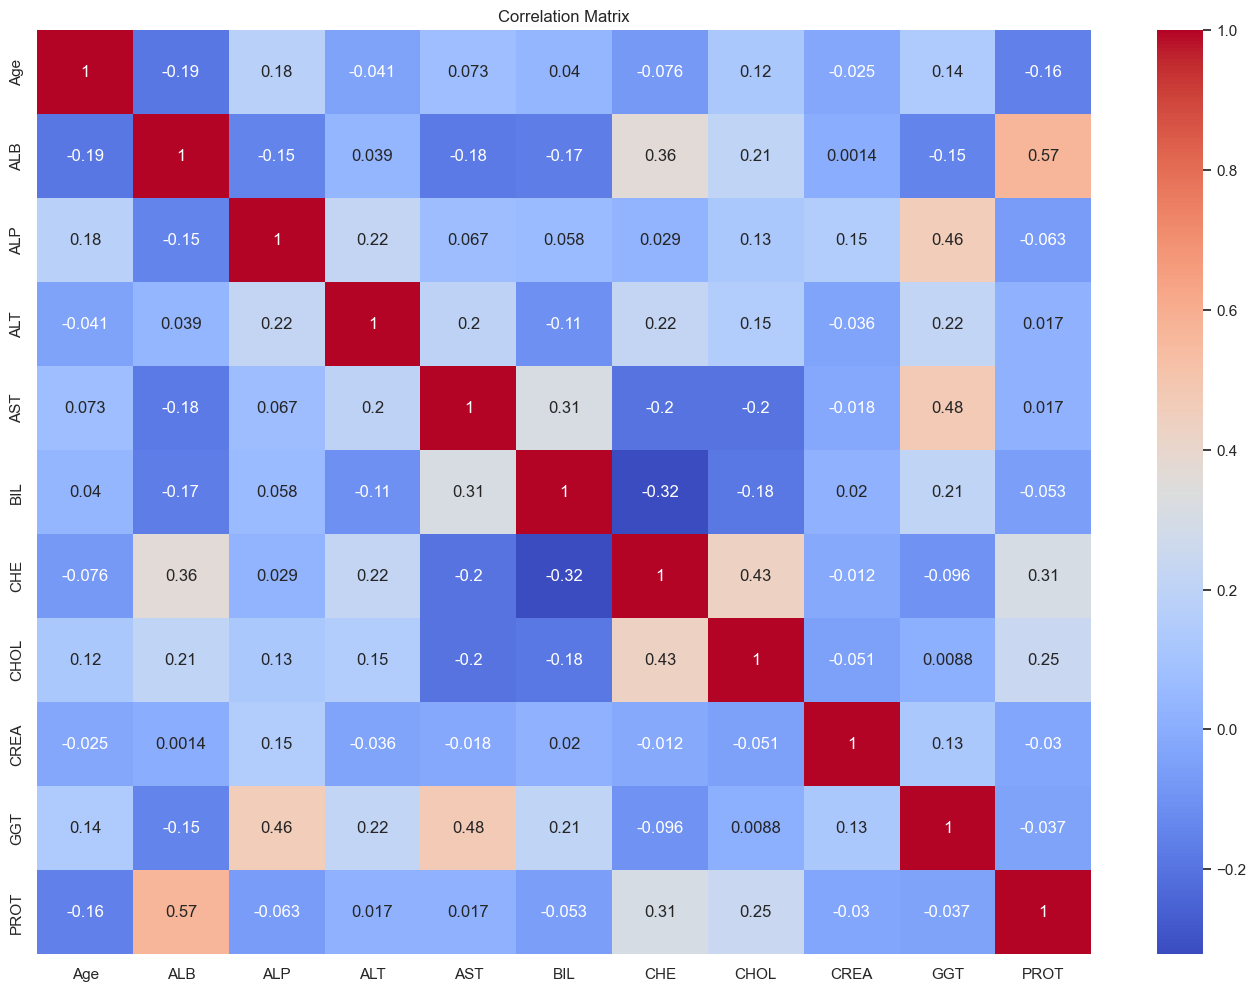

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

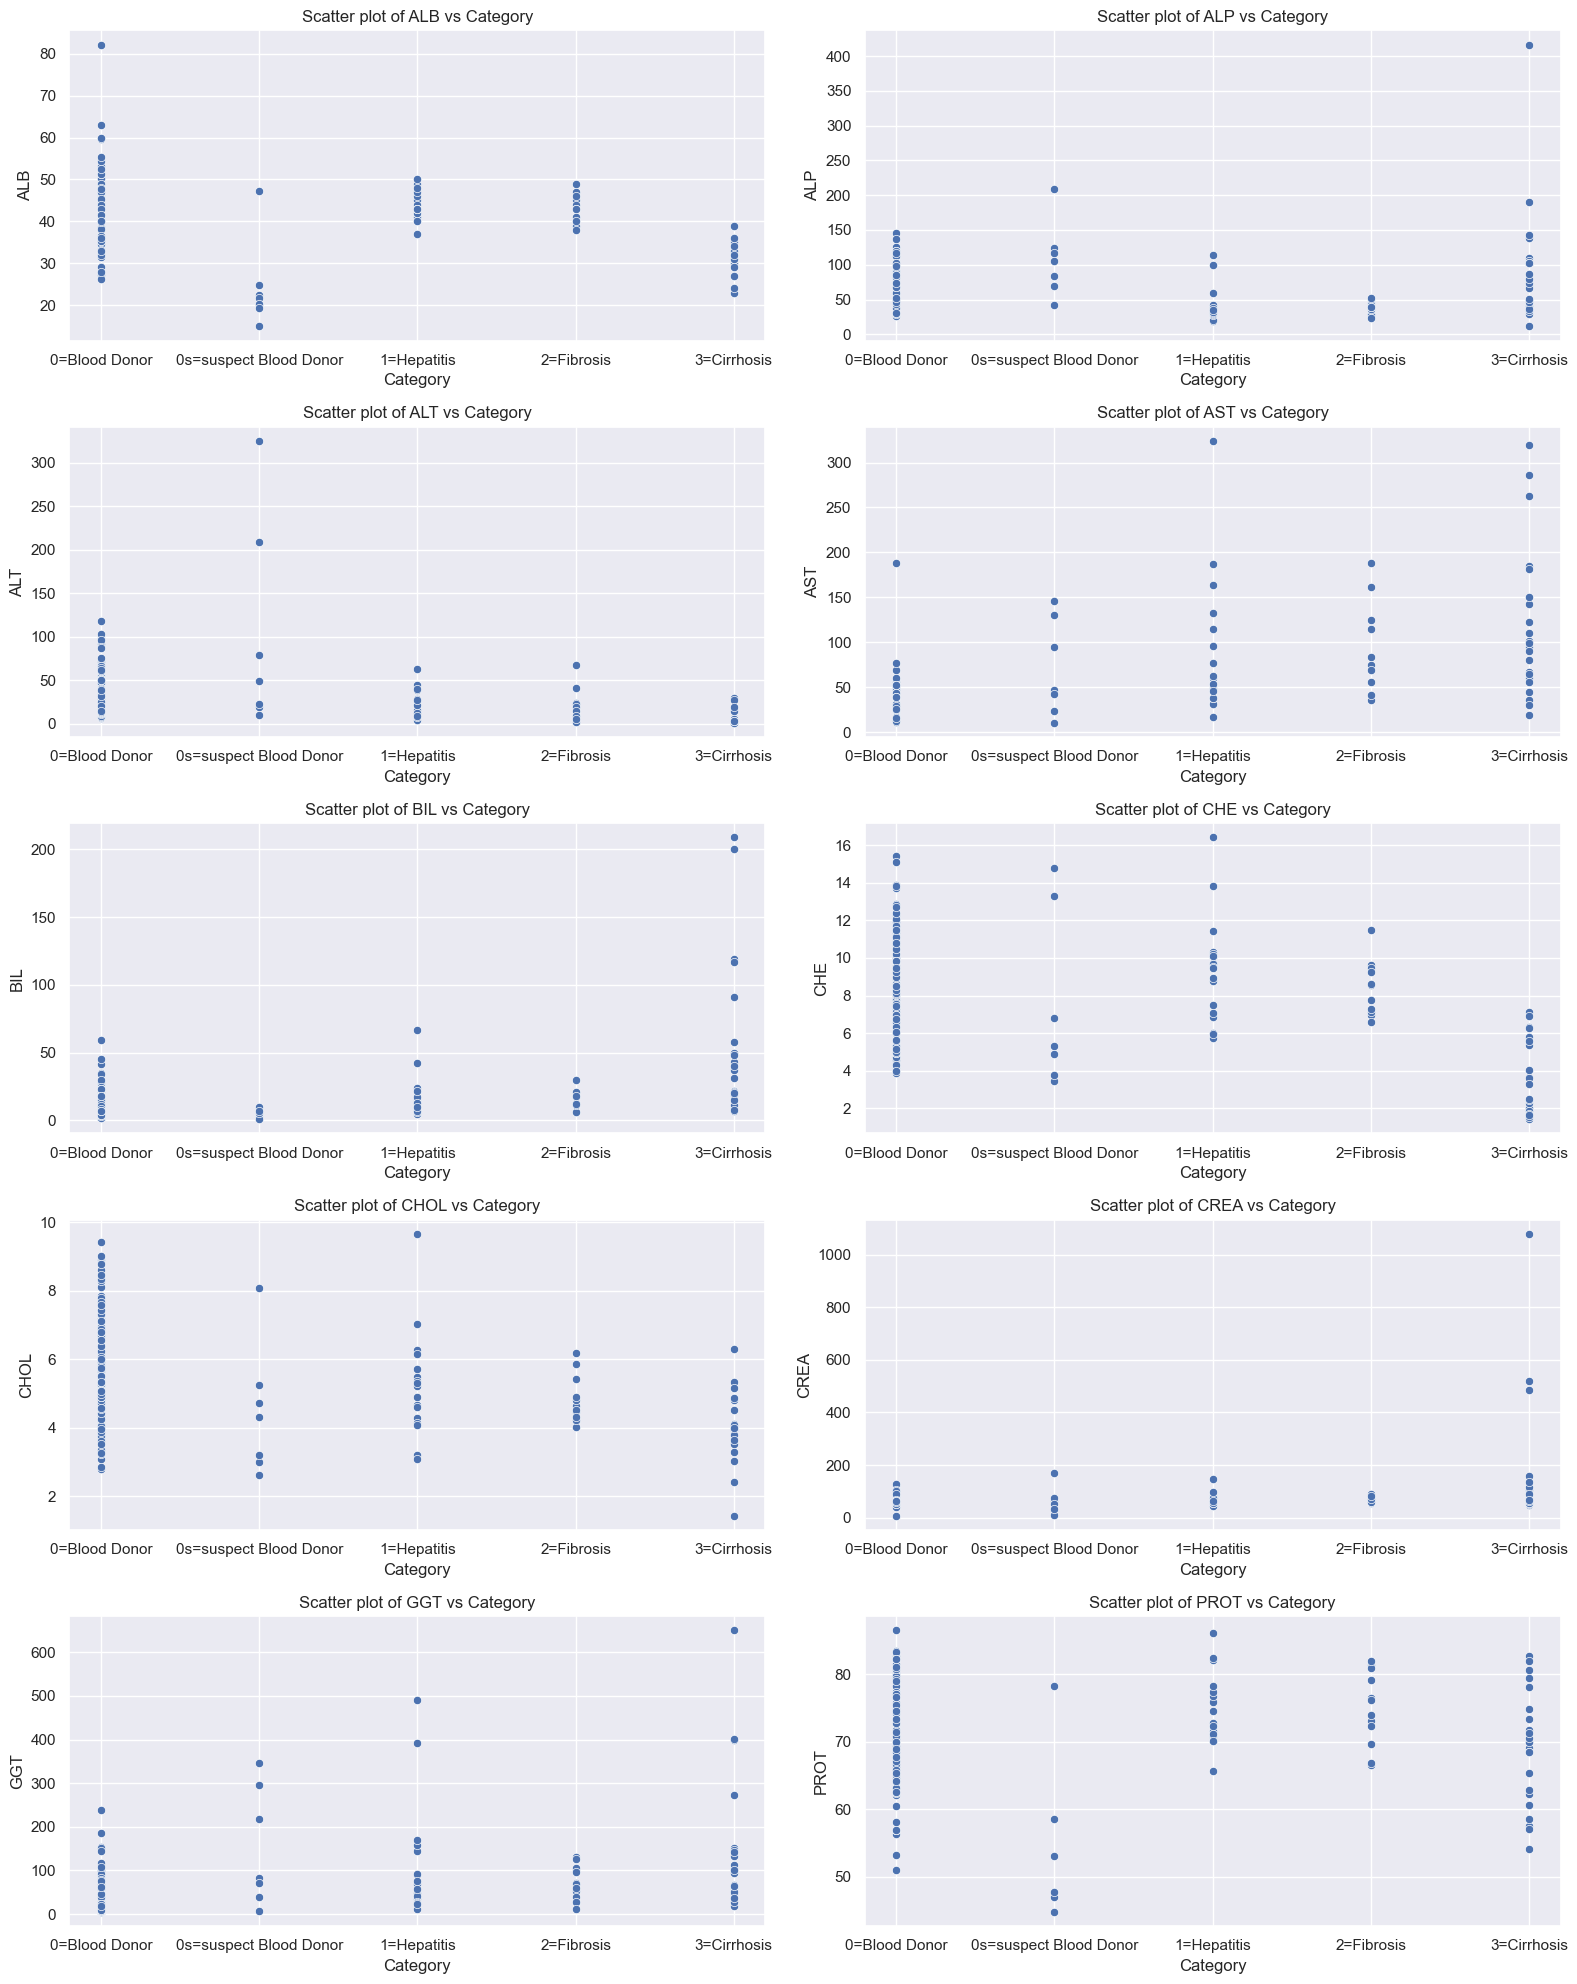

In [12]:
lab_values = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

plt.figure(figsize=(16, 20))
for i, lab in enumerate(lab_values, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x='Category', y=lab)
    plt.title(f'Scatter plot of {lab} vs Category')

plt.tight_layout()
plt.show()

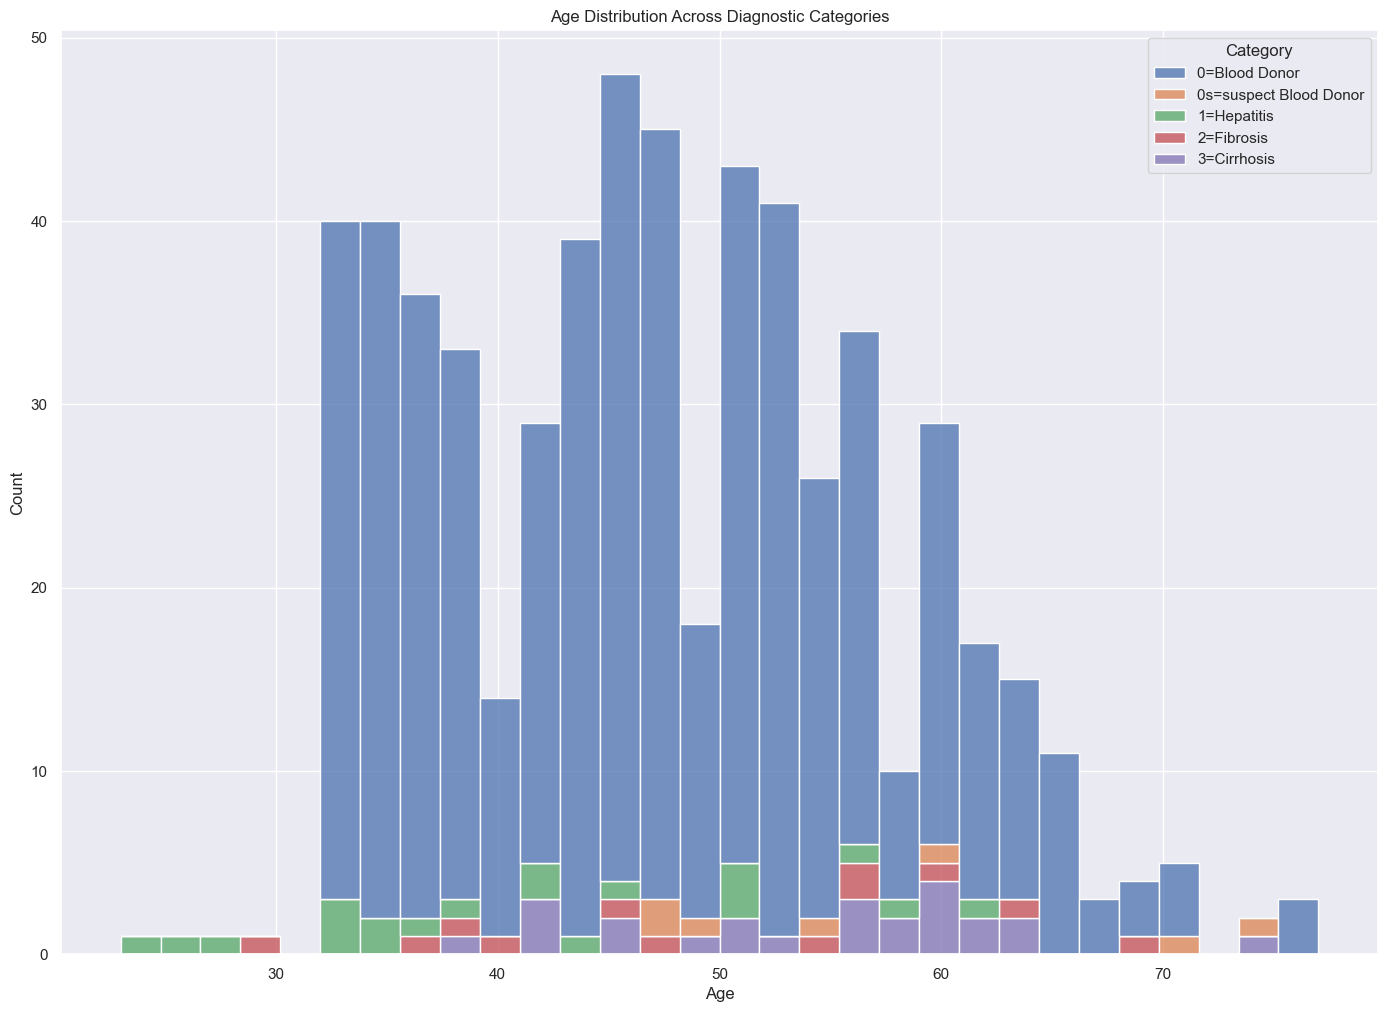

In [13]:
sns.histplot(data=df, x='Age', hue='Category', multiple='stack', bins=30)
plt.title('Age Distribution Across Diagnostic Categories')
plt.show()

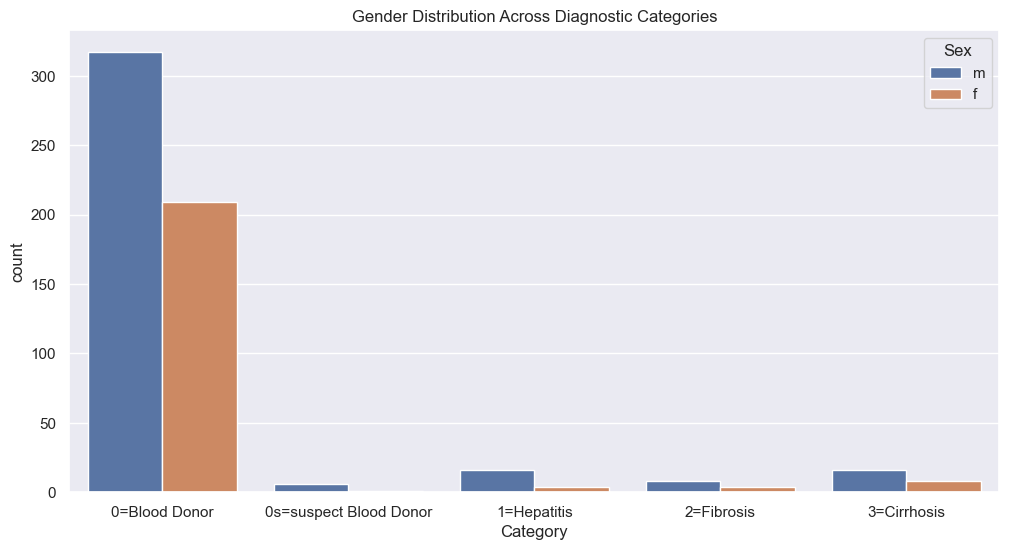

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Sex', data=df)
plt.title('Gender Distribution Across Diagnostic Categories')
plt.show()

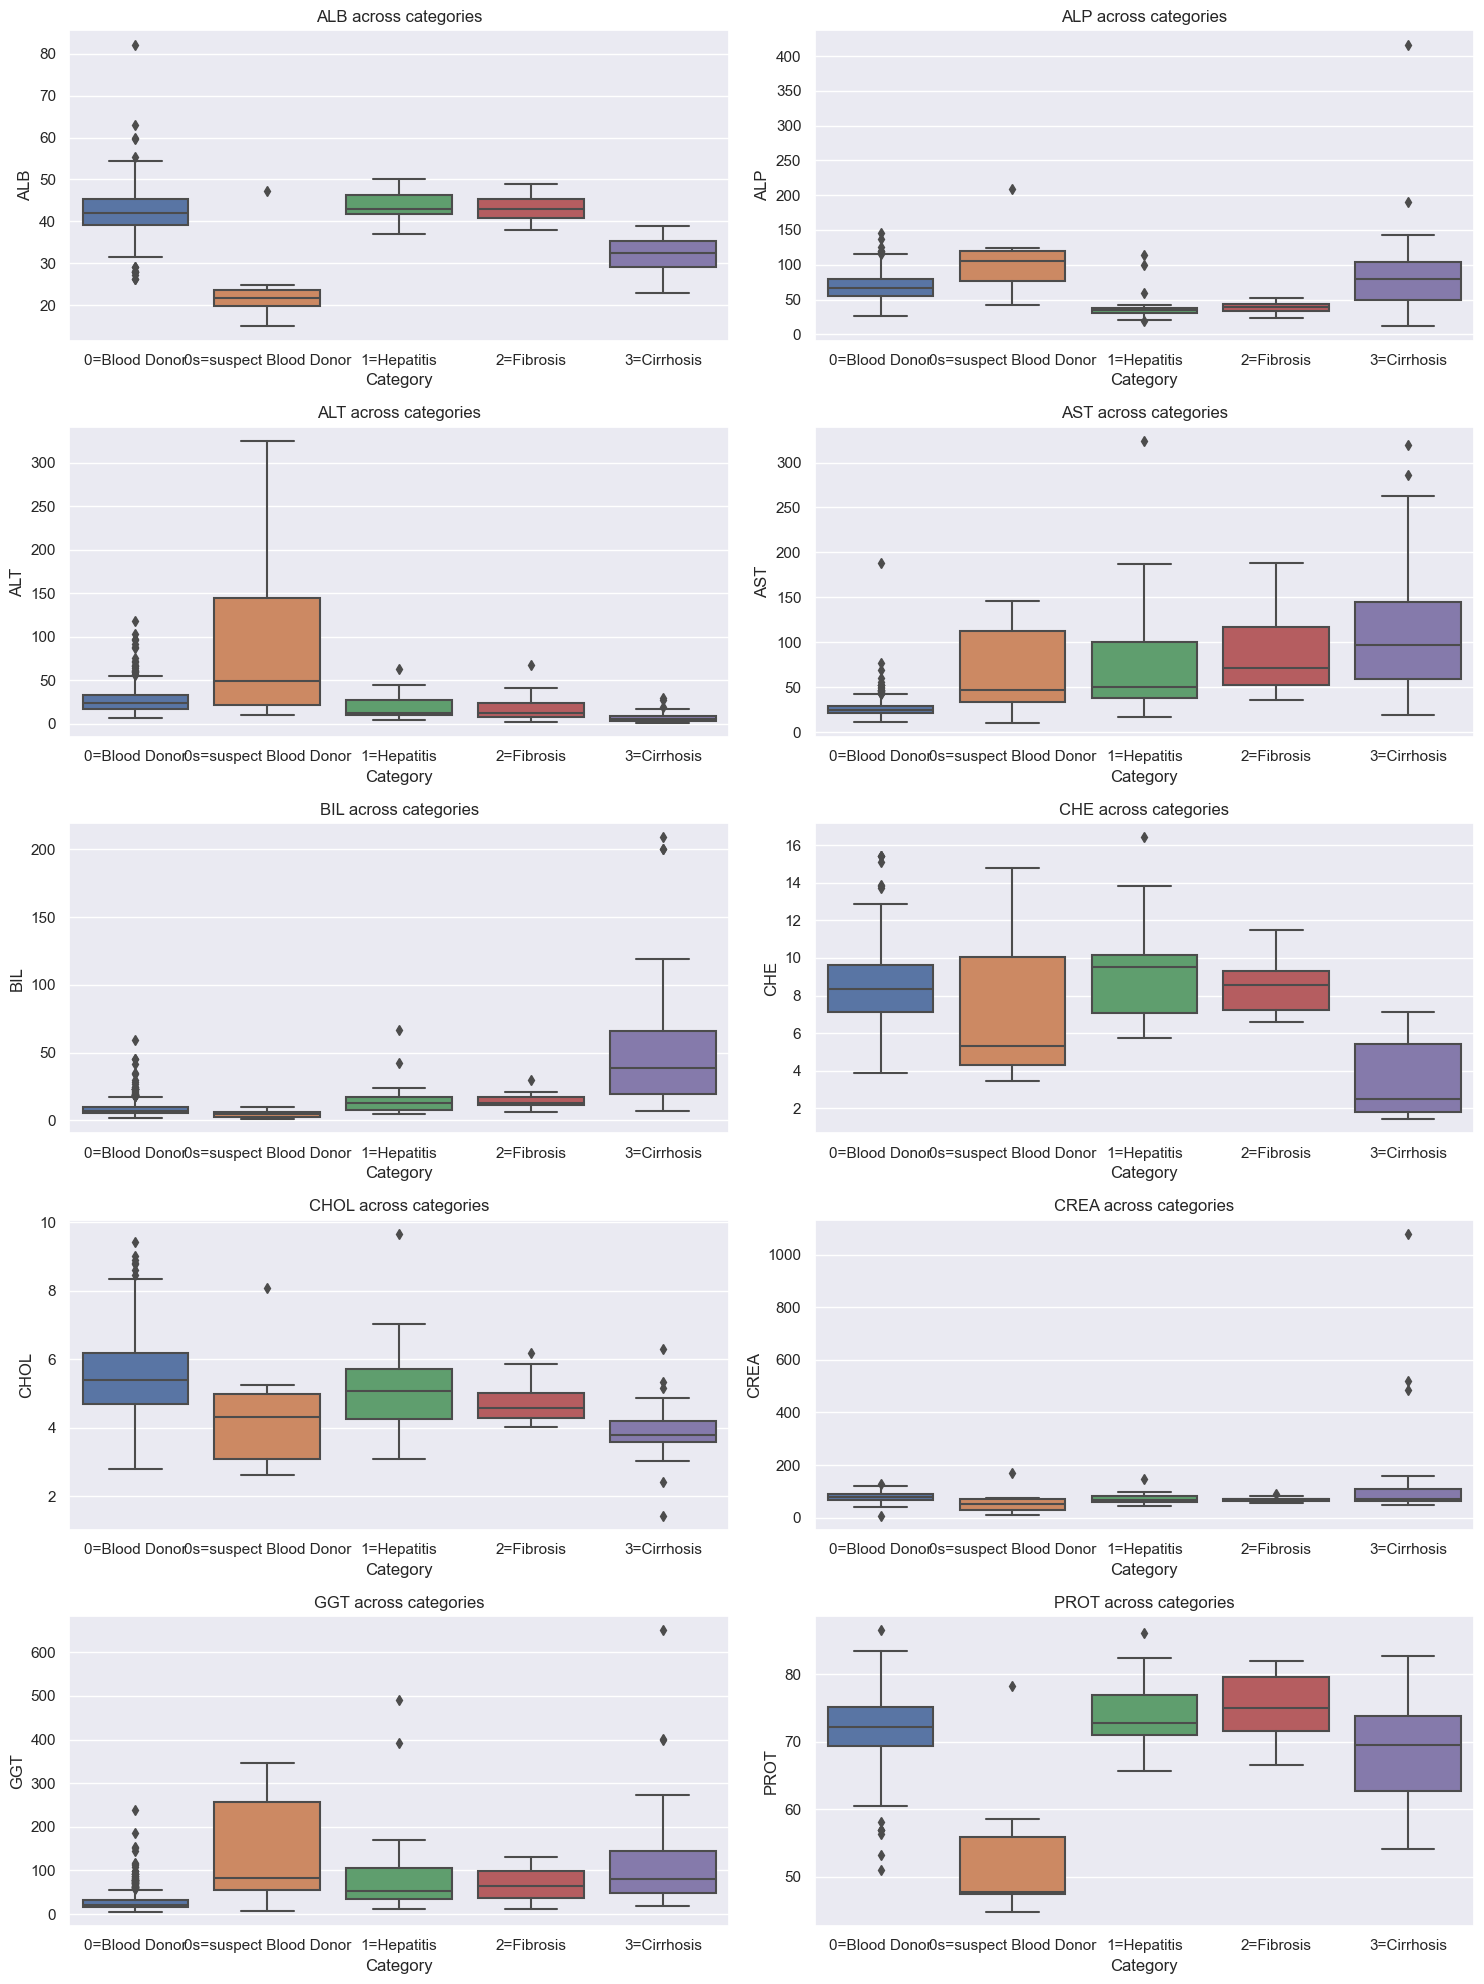

In [15]:
# Boxplot for each laboratory value
plt.figure(figsize=(15, 20))
for i, lab in enumerate(lab_values, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Category', y=lab, data=df)
    plt.title(f'{lab} across categories')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [16]:
df['Category']=df['Category'].apply(lambda x: str(x).split('=')[0])
df['Category'] = df['Category'].replace('0s', 4)
df['Category']=df['Category'].astype('int64')
df['Sex']=df['Sex'].replace(['m','f'],[0,1])

In [17]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
X = df.drop(['Category'], axis=1)
y = df['Category']
# Split the data into training and tes|ting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC()
}


for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.67      0.25      0.36         8
           2       0.40      0.67      0.50         3
           3       1.00      0.67      0.80         6
           4       0.50      0.50      0.50         2

    accuracy                           0.91       118
   macro avg       0.70      0.61      0.63       118
weighted avg       0.91      0.91      0.90       118


Logistic Regression - Confusion Matrix:
[[98  0  0  0  1]
 [ 5  2  1  0  0]
 [ 0  1  2  0  0]
 [ 0  0  2  4  0]
 [ 1  0  0  0  1]]

Logistic Regression - Accuracy: 0.9068

Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       0.00      0.00      0.00         8
           2       0.25      0.

In [21]:
rf_model = models['Random Forest']

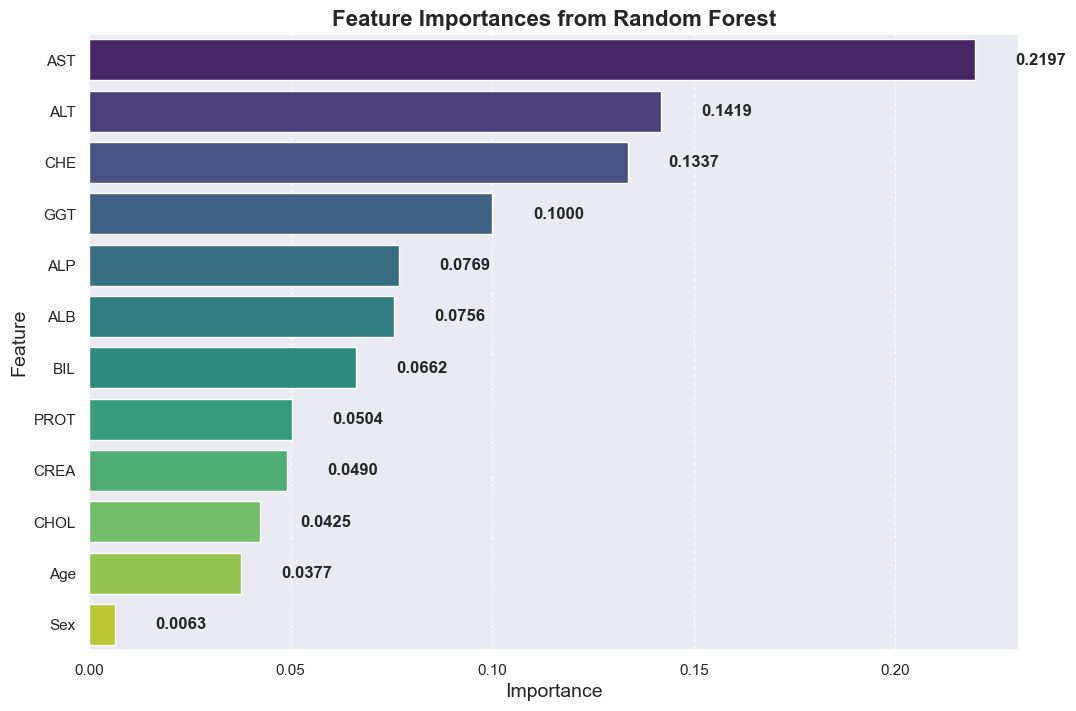

In [27]:
feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01, p.get_y() + p.get_height()/2, f'{width:.4f}', 
            va='center', ha='left', fontsize=12, weight='bold')

plt.title('Feature Importances from Random Forest', fontsize=16, weight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()